In [175]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import skimage
from skimage.color import rgb2gray

RED =   [1.,0.,0.]
GREEN = [0.,1.,0.]
BLUE =  [0.,0.,1.]

def draw_circle(image, point, color=RED, size=3):
    rr, cc = skimage.draw.disk(point, size, shape=image.shape)
    image[rr, cc] = color

def color_at(image, point):
    return image[point[0],point[1]]

def color_eq(c1, c2):
    return all(c1 == c2)

def show(original, processed):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(processed)
    ax[1].set_title("Processed")
    fig.tight_layout()
    plt.show()
##################################### 
### Reading image
##################################### 

#original = io.imread("examples/pixels.png")
original = io.imread("examples/Hello world!.png")


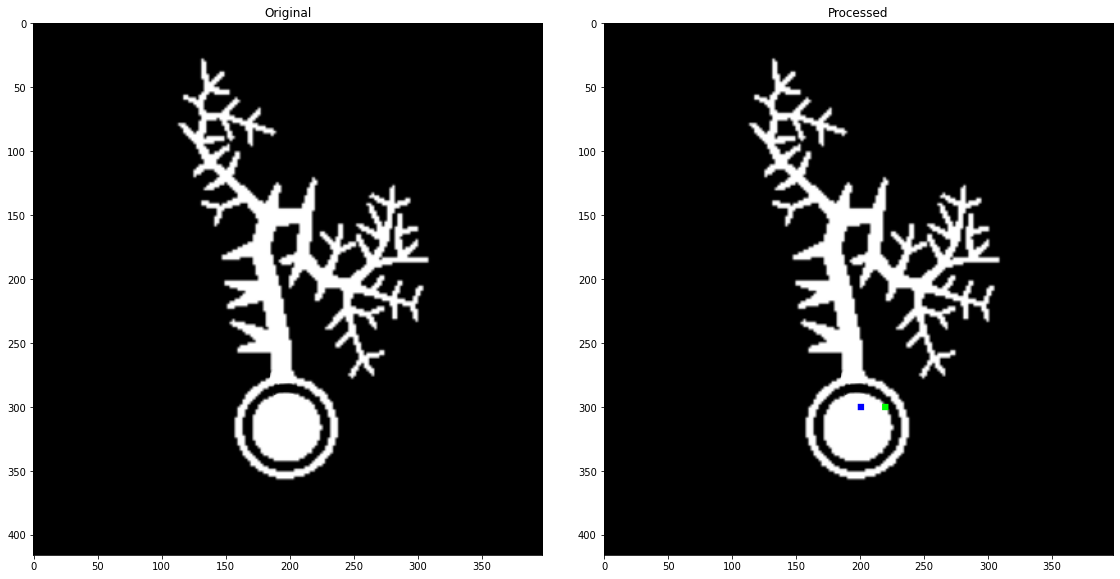

In [182]:
##################################### 
### Processing image
##################################### 

original = original[:,:,:3]
grayscale = rgb2gray(original)
imgY, imgX = grayscale.shape # scikit uses [Y, X, Channel] representation
img = np.repeat(grayscale[:, :, np.newaxis], 3, axis=2) # Duplicating grayscale

##################################### 
### Seed detection
##################################### 

# for i in range(100):
#     random_point = (np.random.randint(imgY), np.random.randint(imgX))
#     draw_circle(processed, random_point)

op = (300, 200) # random point that hopefully is inside the circle
# 1 Go towards right until you get out of the circle  (p1)
cop = color_at(img,op)
p1 = op
while (color_eq(cop, color_at(img,p))): 
    p1 = (p1[0], p1[1]+1) # Go right
    if (p1[1] >= imgX):
        break

# 2 Keep going right until you get to the outer circle (p2)
cp1 = color_at(img, p1)
p2 = p1
while (color_eq(cp1, color_at(img,p2))):  #TODO color_eq is too strict
    p2 = (p2[0], p2[1]+1) # Go right
    if (p2[1] >= imgX):
        break

# 3 Start traveling on the edge until you get back to the start

draw_circle(img, op)
draw_circle(img, p1, BLUE)
draw_circle(img, p2, GREEN)
show(original, img)